# EDA and Model Building for Crop Recommendation System

# Part I: Exploratory Data Analysis (EDA)

In [39]:
# import libraries
import sweetviz as sv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
crop_df = pd.read_csv('./Crop_recommendation.csv')

In [3]:
# Check the shape of the dataset
print(crop_df.shape)

(1697, 8)


In [4]:
# View Dataset
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Check the data type of each column
crop_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
# Checking for missing values
print(crop_df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
# Type of Crops in the Dataset
pd.unique(crop_df['label'])

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

### Further Step:
Our targeted audience for the application is canadian. And in canada, due to cold weather, limited type of crops can be grown. So, the crops like banana, coffee, cotton, cowpeas, groundnuts, watermelon, mango and orange are unsuitable to grow. So, we are removing those crops from our dataset.

In [8]:
# Removing unsuitable crops for Canadian weather

#Defind the crops to be remove
crops_to_remove = ['banana', 'coffee','cotton', 'cowpeas', 'groundnuts', 'watermelon', 'mango', 'orange']
filtered_crop_df = crop_df[~crop_df['label'].isin(crops_to_remove)]

In [9]:
# Type of Crops in the Filtered Dataset
pd.unique(filtered_crop_df['label'])

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'grapes', 'apple'],
      dtype=object)

In [10]:
# Check the shape of the dataset
print(filtered_crop_df.shape)

(813, 8)


In [11]:
# Key Statistics
filtered_crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,42.525215,77.638376,77.290283,22.588083,56.966143,6.308703,111.584416
std,28.358818,33.829726,73.142225,5.047262,28.786141,0.836535,59.421869
min,0.000000,35.000000,15.000000,8.825675,14.258040,4.548202,5.314507
25%,22.000000,55.000000,21.000000,19.331626,22.331959,5.732454,73.092670
50%,35.000000,66.000000,39.000000,22.055923,65.345839,6.112306,96.658889
75%,67.000000,80.000000,85.000000,24.714175,82.456872,6.655918,125.097269
max,100.000000,145.000000,205.000000,41.948657,94.920481,8.967058,298.560117


In [12]:
# Data Visualization using Sweetviz
crop_report = sv.analyze(filtered_crop_df)

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


In [13]:
# Creating HTML file
crop_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


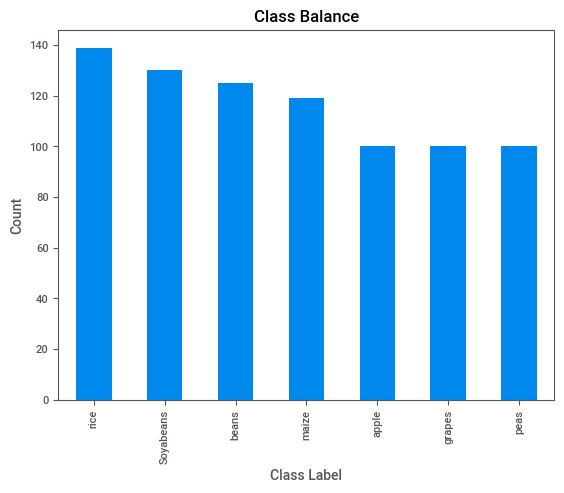

In [14]:
# Class Balance Check
class_counts = filtered_crop_df['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Balance')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

### Insights:
- There are seven type of crop in the dataset.
- The dataset comprise of almost equal number of observation for each classes so, there is class balance in the dataset and will not have any biases during prediction.

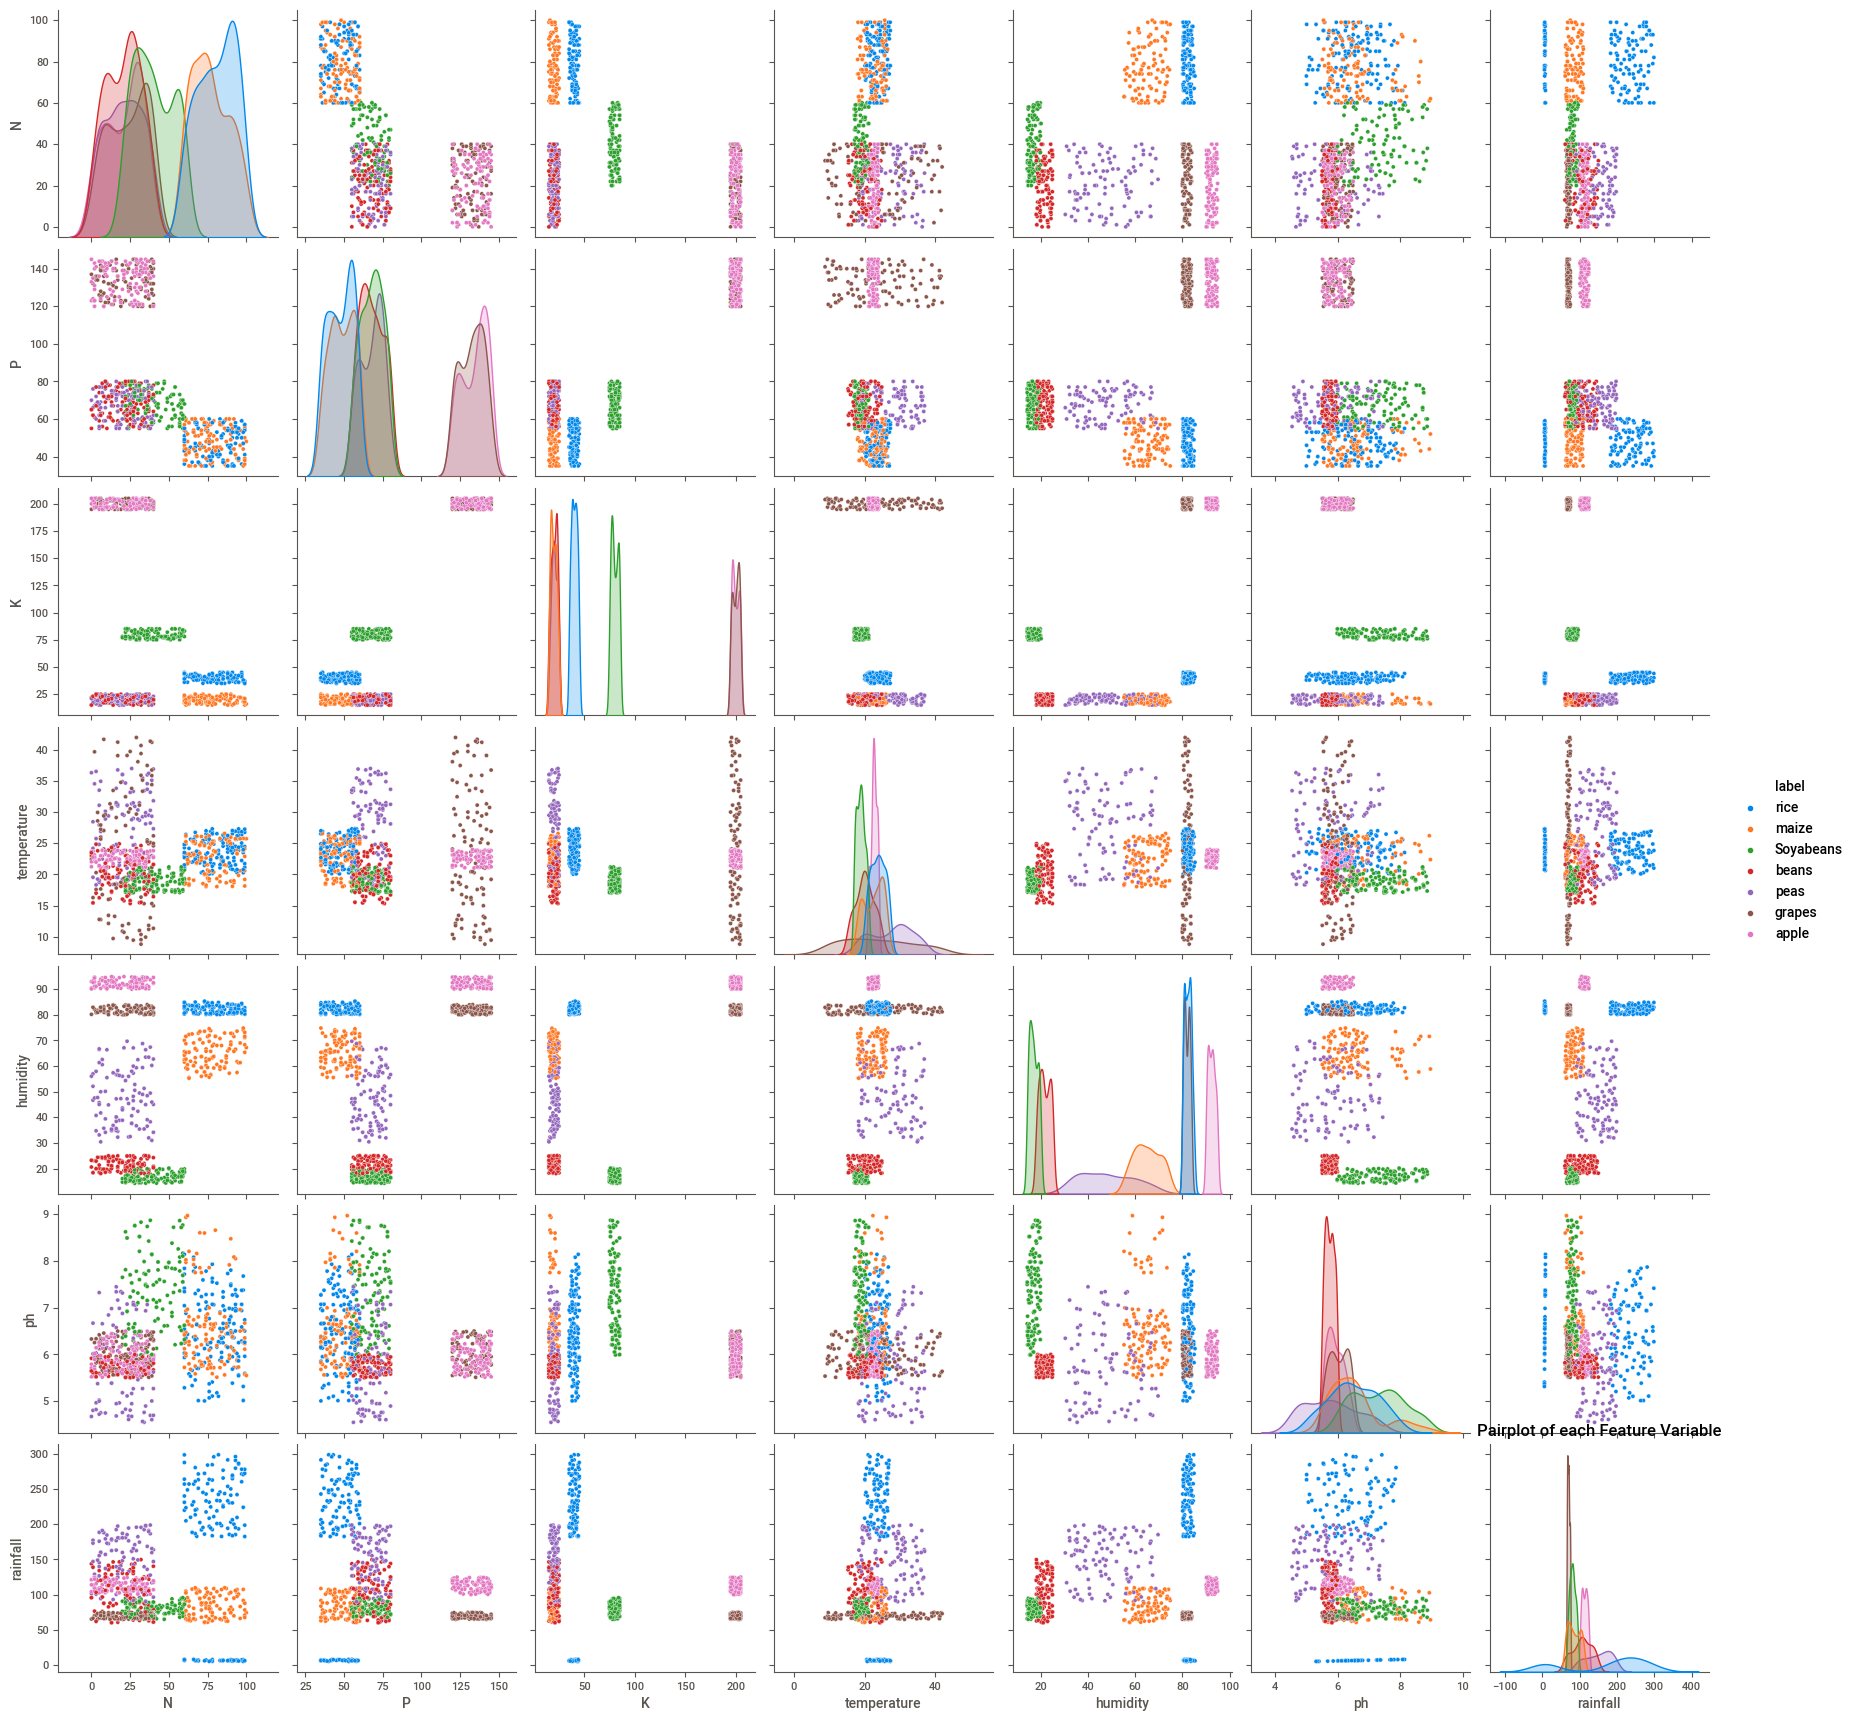

In [15]:
# Pairplot of each features with color coded by label
sns.pairplot(filtered_crop_df, hue = 'label')
plt.title("Pairplot of each Feature Variable")
plt.show()

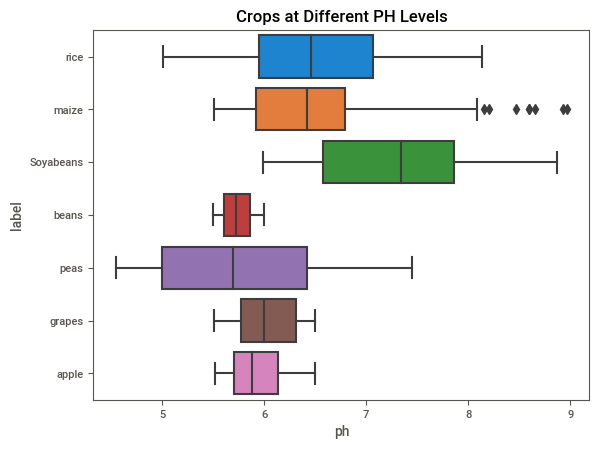

In [16]:
# What level of PH required for each crops?
sns.boxplot(y='label',x='ph',data=filtered_crop_df)
plt.title("Crops at Different PH Levels")
plt.show()

### Answers:
- Beans, Peas, Grapes and Apple are suitable to grow in the soil having 5 to 7 PH level.
- Rice, Maize and Soyabeans are suitable to grow in the soil having PH level of 6 to 8.

###### Note:
- Maze has some outlier points, but we are not still dropping the outlier for now. However we may consider to drop it in future if our model performance suffer from this.

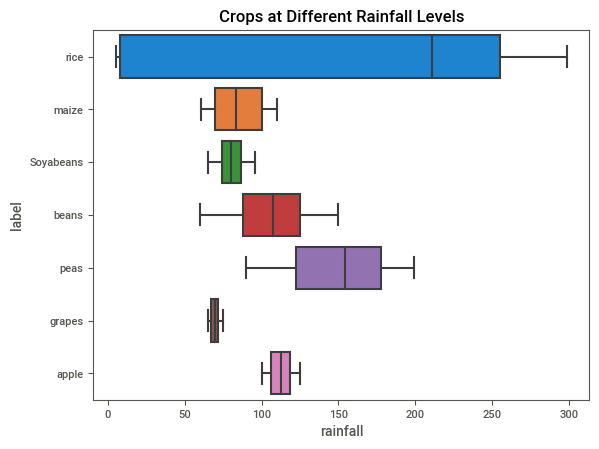

In [17]:
# At what level of rainfall these crop are suitable?
sns.boxplot(y='label',x='rainfall',data=filtered_crop_df)
plt.title("Crops at Different Rainfall Levels")
plt.show()

### Answers:
- Grapes are suitable where the rainfall is 60 ml to 80 ml.
- Soyabean are suitable where the rainfall is 70 ml to 100 ml.
- Apple are suitable where the rainfall is 100 ml to 130 ml
- Maize, Beans and Peas can be grown in a wide range of rainfall but below 200 ml.
- Rice rquired a high level of rainfall on average more than 200 ml which is a fact. But in the dataset the spectrum is high having low level of rainfall which may be because of our improved irrigation system.

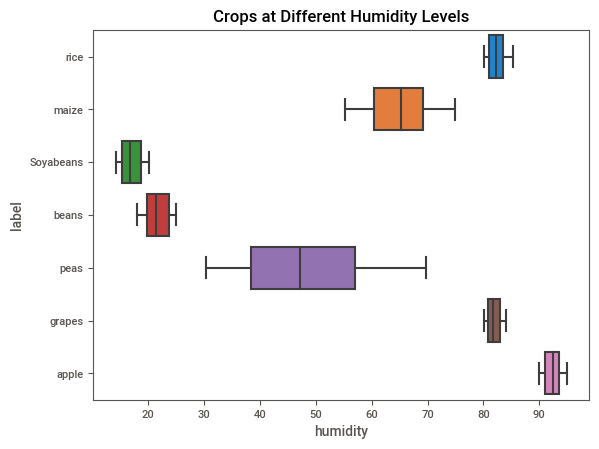

In [18]:
# At what level of Humidity each crops can be grown?
sns.boxplot(y='label',x='humidity',data=filtered_crop_df)
plt.title("Crops at Different Humidity Levels")
plt.show()

### Answers:
- Soyabeans and Beans can be grown in relatively low humid climate.
- Peas can be gorwn in a range of low to slightly high humid climate.
- Maize can be grown in slightly high humid climate.
- Rice, Grapes, and Apples generally require highly humid climate. 

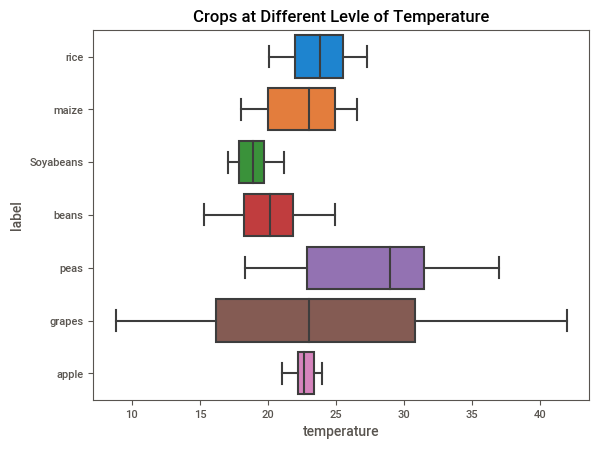

In [19]:
# At what tempreture level each crops can be grown?
sns.boxplot(y='label',x='temperature',data=filtered_crop_df)
plt.title("Crops at Different Levle of Temperature")
plt.show()

### Answers:
- Grapes can be grown in high to low level of tempreture.
- Peas also can be grown in in slightly cold and slightly hot tempreture.
- Apple are suitable to grow where the tempretures are between 20 to 25 C.
- Beans, Soyabeans, Maize and Rice are suitable in a temperature range of 15 to 30 C.

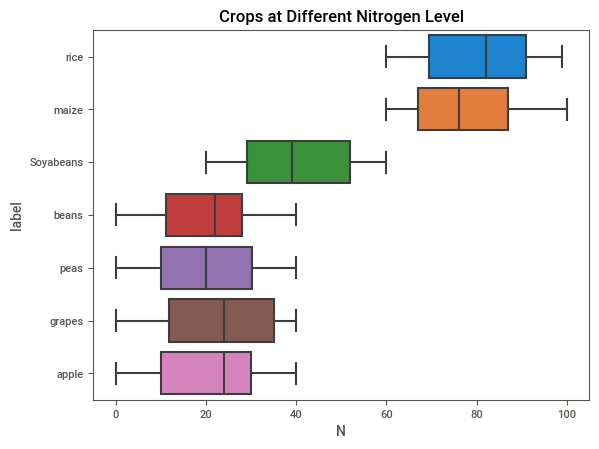

In [20]:
# What Nitrogen level is required for each crops?
sns.boxplot(y='label',x='N',data=filtered_crop_df)
plt.title("Crops at Different Nitrogen Level")
plt.show()

### Answers:
- Apple, Grapes, Peas, Beans require 20 to 22 mg/kg on average.
- Soyabeans require almost 40 mg/kg on average.
- Rice and Maize require highest i.e. 80 mg/kg on average.

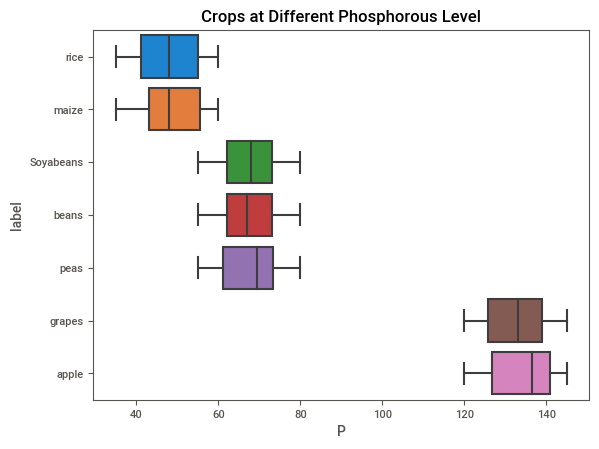

In [21]:
# What Phosphorous level is required for each crops?
sns.boxplot(y='label',x='P',data=filtered_crop_df)
plt.title("Crops at Different Phosphorous Level")
plt.show()

### Answers:
- Rice and Maize require least amount of Phosphorous i.e. about 50 mg/kg.
- Soyabeans, beans and Peas require moderate level of Phosphorous i.e. about 70 mg/kg.
- Grapes and Apple require high level of Phosphorous i.e almost 130 mg/kg.

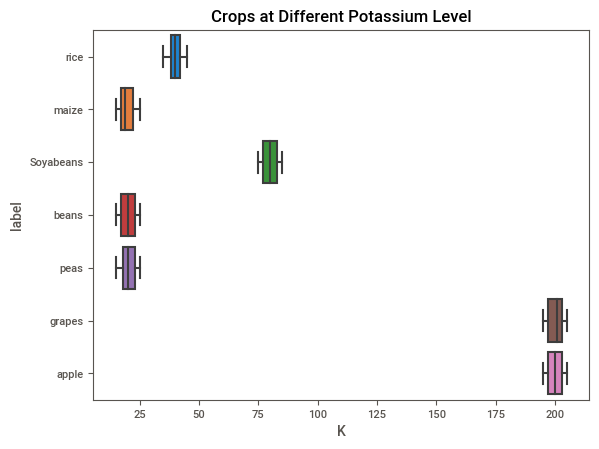

In [22]:
# What Potassium level is required for each crops?
sns.boxplot(y='label',x='K',data=filtered_crop_df)
plt.title("Crops at Different Potassium Level")
plt.show()

### Answers:
- Peas, Beans and Maize require low level of Potassium i.e approx 25 mg/kg.
- Rice required 40 mg/kg and Soyabeans require 80 mg/kg.
- Grape and Apple required highest level of Potassium i.e. 200 mg/kg.

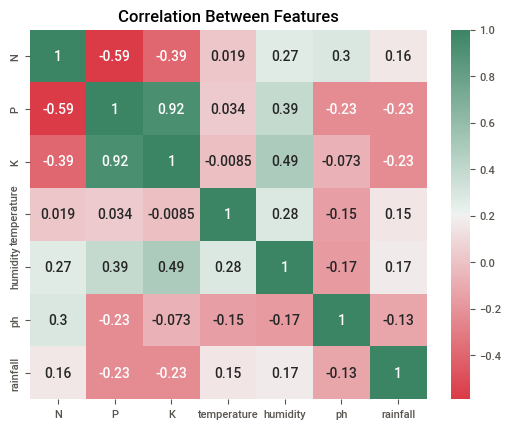

In [23]:
# Correlation Betwee Feature Variables

# Set the colormap to diverging with red for negative and green for positive values
cmap = sns.diverging_palette(10, 150, as_cmap=True)

# Create the heatmap and set the colormap
sns.heatmap(filtered_crop_df.corr(), cmap=cmap, annot=True)
plt.title("Correlation Between Features")
plt.show()

### Insights:
- The feature variable Potassium (K) and Phosphorus (P) are highly positively correlelated.
- The feature variable Nitrogen (N) and Phosphorus (P) are highly negitavely correlated.
- All other varaables are moderate to no correlation.

# Model Building for Crop Recommendation System

In [24]:
# Extrating features adn assinging to X and Assigning labels to y variables

X = filtered_crop_df.drop('label', axis=1)
y = filtered_crop_df['label']

In [25]:
# View X variable
print(X)

       N   P   K  temperature   humidity        ph    rainfall
0     90  42  43    20.879744  82.002744  6.502985  202.935536
1     85  58  41    21.770462  80.319644  7.038096  226.655537
2     60  55  44    23.004459  82.320763  7.840207  263.964248
3     74  35  40    26.491096  80.158363  6.980401  242.864034
4     78  42  42    20.130175  81.604873  7.628473  262.717340
...   ..  ..  ..          ...        ...       ...         ...
1636   3  67  24    17.000676  19.907905  5.520880  103.292641
1637  35  69  23    16.787915  24.968818  5.578410   75.453280
1638   3  77  25    24.849062  22.894646  5.608165   62.212922
1639  23  62  19    16.517835  20.455560  5.609435   98.777942
1640  22  71  17    18.153002  19.386021  5.509295  107.690796

[813 rows x 7 columns]


In [26]:
# View y variable
print(y)

0        rice
1        rice
2        rice
3        rice
4        rice
        ...  
1636    beans
1637    beans
1638    beans
1639    beans
1640    beans
Name: label, Length: 813, dtype: object


## Train and Test Split

### Train and Test Split Strategy:
Generally the training and test split is done in the ratio of 70:30 and 80:20. Our dataset is small with 813 observations. So, in order to better train our model we have to give more data to our model. Hence, we are apliting data with 80:20 ratio, 80% for training and 20% for testing.

In [27]:
#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state= 100)

### Data Pre-Processing

In [28]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

### Building and Evaluating Decision Tree Model

In [29]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier  

for name, tree in [('Decision Tree Classifier', DecisionTreeClassifier(random_state=100))]: 
    tree.fit(x_train2,y_train)
    predict = tree.predict(x_test2)

In [30]:
# Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
print('\nEstimator: {}'.format(name)) 
print(confusion_matrix(y_test,predict))  
print(classification_report(y_test,predict)) 


Estimator: Decision Tree Classifier
[[26  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
       beans       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
        peas       1.00      1.00      1.00        20
        rice       1.00      1.00      1.00        28

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



### Interpretation:
In this Decision Tree model the precision, recall, f1-score and accuracy are 100% which shows the model overfits and just following the data points. Hence, we need to look for other algorithm which could generalize our algorithm.

### Further Step:
As our Decision Tree model overfits, we are going to train a Random forest model which consists of multiple trees. Then we will evaluates its performance to find out if it is able to generalize our dataset or not.

### Building and Training Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(x_train2, y_train)
predict_rfc = rfc.predict(x_test2)

In [32]:
# Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
print('\nEstimator: Random Forest Classifier') 
print(confusion_matrix(y_test,predict_rfc))  
print(classification_report(y_test,predict_rfc))


Estimator: Random Forest Classifier
[[26  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
       beans       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
        peas       1.00      1.00      1.00        20
        rice       1.00      1.00      1.00        28

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



### Building and Training KNN Model

In [33]:
# Import the Model
from sklearn.neighbors import KNeighborsClassifier

#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score

k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn_org = KNeighborsClassifier(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_org, x_train2, y_train, cv=10, scoring='recall_weighted')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
#Print Best Score
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]

#Create Orginal KNN model
classifier_org = KNeighborsClassifier(n_neighbors = best_k)

#Fit KNN Model
classifier_org.fit(x_train2, y_train)

#Prediction
from sklearn.metrics import classification_report, confusion_matrix  
y_pred_org = classifier_org.predict(x_test2)
target_names=['Soyabeans','apple','beans', 'grapes', 'maize', 'peas', 'rice']
print('\nEstimator: k-NN')
print('\nn_neighbors:',str(best_k))
print('\n', confusion_matrix(y_test,y_pred_org))  
print(classification_report(y_test,y_pred_org,target_names=target_names))


Estimator: k-NN

n_neighbors: 1

 [[26  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  1  0  0 19  0]
 [ 0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
       beans       0.96      1.00      0.98        25
      grapes       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
        peas       1.00      0.95      0.97        20
        rice       1.00      1.00      1.00        28

    accuracy                           0.99       163
   macro avg       0.99      0.99      0.99       163
weighted avg       0.99      0.99      0.99       163



### Building and Training SVM and NB

In [34]:
# Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for name, method in [('SVM', SVC(kernel='linear', random_state = 100)),
                    ('Naive Bayes', GaussianNB())]:
    method.fit(x_train2, y_train)
    predict = method.predict(x_test2)
    target_names = ['Soyabeans','apple','beans', 'grapes', 'maize', 'peas', 'rice']
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict, target_names = target_names))


Estimator: SVM
[[26  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
       beans       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
        peas       1.00      1.00      1.00        20
        rice       1.00      1.00      1.00        28

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163


Estimator: Naive Bayes
[[26  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 28]]
              precision  

In [35]:
# Model Import
from sklearn.linear_model import LogisticRegression

# Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix

for name, method in [('LogReg', LogisticRegression(solver = 'liblinear',
                                                  class_weight = 'balanced',
                                                  random_state = 100))]:
    method.fit(x_train2, y_train)
    predict = method.predict(x_test2)
    print('\nEstimator:{}'.format(name))
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))


Estimator:LogReg
[[26  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  3  0  0 17  0]
 [ 0  0  0  0  4  0 24]]
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
       beans       0.89      1.00      0.94        25
      grapes       1.00      1.00      1.00        20
       maize       0.86      1.00      0.92        24
        peas       1.00      0.85      0.92        20
        rice       1.00      0.86      0.92        28

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163



In [36]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='liblinear',class_weight='balanced',
                                               random_state=100))])
pipeline.insert(0,pipe_logreg)

#Set grid search params 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l1','l2']}
modelpara.insert(0,param_gridlogreg)

In [37]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.1])
    plt.show()

Logisistic Regression - Learning Curve


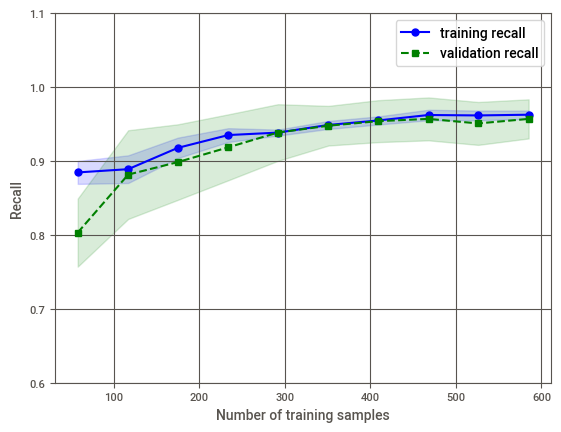

In [38]:
#Plot Learning Curve
print('Logisistic Regression - Learning Curve')
plot_learning_curves(pipe_logreg)

### Insights
- The learning curve shows that the model has learn almost 90% with 150 observations and then the recall score is 95% after 300 observation.
- After 300 observation the recall score is stable in approx. 95% which indicates our model has learned after 300 observation.

### Conclusion:
Our dataset is relatively small with 813 observations and 7 features. So, this dataset is relatively smaller and when we are building models, the models are overfitting. All of the models has accuracy of more than 95%. So, in this case our model selection would be based on simplicity, less prone to overfit and more applicable to our dataset.

### Model Selection:
For our crop recommendation system we have selected Logistic Regression based on follwing points:
- LR model is simple to understand.
- LR model is less prone to overfitting compared to other models.
- LR model properly handle multi-classification tasks.

### Final Recommendation:
- More data need to be collected in order to train a reliable model for prediction.
- There could be other additional variables that are relevant in recommending crop selection. So, those variables need to be researched and data need to be collected for improvements.